In [1]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from numpy import asarray
from PIL import Image
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D

Using TensorFlow backend.


In [3]:
#labelling data and reading images from the dataset(training dataset)
filenames = (os.listdir("../input/dogs-vs-cats/train/train/"))
y_train = []
x_train = []
for i in filenames:
    photo = load_img("../input/dogs-vs-cats/train/train/"+i,target_size=(128,128))
    photo = img_to_array(photo)
    x_train.append(photo)
    if 'cat' in i:
        y_train.append(0)
    else:
        y_train.append(1)
x_train = asarray(x_train)
y_train = np.array(y_train)

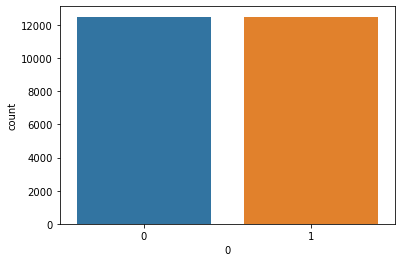

In [4]:
#count plot of ratio of number of cats vs dogs images
import seaborn as sns
sns.countplot(x=pd.DataFrame(y_train)[0], data=pd.DataFrame(y_train))

In [5]:
#labelling data and reading images from the dataset(test dataset)
filenames = (os.listdir("../input/cat-and-dog/test_set/test_set/cats/"))
y_test = []
x_test = []
for i in filenames:
    if i != '_DS_Store':
        photo = load_img("../input/cat-and-dog/test_set/test_set/cats/"+i,target_size=(128,128))
        photo = img_to_array(photo)
        x_test.append(photo)
        if 'cat' in i:
            y_test.append(0)
        else:
            y_test.append(1)
filenames = (os.listdir("../input/cat-and-dog/test_set/test_set/dogs/"))
for i in filenames:
    if i != '_DS_Store':
        photo = load_img("../input/cat-and-dog/test_set/test_set/dogs/"+i,target_size=(128,128))
        photo = img_to_array(photo)
        x_test.append(photo)
        if 'cat' in i:
            y_test.append(0)
        else:
            y_test.append(1)
x_test = asarray(x_test)
y_test = np.array(y_test)

In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print(x_train.shape)
print(y_train.shape)

(25000, 128, 128, 3)
(25000, 2)


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(128,128,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)      

In [10]:
model_train = model.fit(x_train, y_train, batch_size=64,epochs=20,verbose=1,validation_split=0.10)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 16s 706us/step - loss: 6.7650 - accuracy: 0.6299 - val_loss: 0.5775 - val_accuracy: 0.7064
Epoch 2/20
22500/22500 [==============================] - 11s 503us/step - loss: 0.5400 - accuracy: 0.7315 - val_loss: 0.6263 - val_accuracy: 0.6956
Epoch 3/20
22500/22500 [==============================] - 11s 510us/step - loss: 0.4622 - accuracy: 0.7816 - val_loss: 0.5001 - val_accuracy: 0.7688
Epoch 4/20
22500/22500 [==============================] - 11s 493us/step - loss: 0.4053 - accuracy: 0.8142 - val_loss: 0.4968 - val_accuracy: 0.7796
Epoch 5/20
22500/22500 [==============================] - 11s 502us/step - loss: 0.3620 - accuracy: 0.8356 - val_loss: 0.4714 - val_accuracy: 0.7960
Epoch 6/20
22500/22500 [==============================] - 11s 496us/step - loss: 0.3115 - accuracy: 0.8651 - val_loss: 0.4685 - val_accuracy: 0.8040
Epoch 7/20
22500/22500 [==============================] -

In [13]:
model.fit(x_train, y_train, batch_size=64,epochs=20,verbose=1,validation_split=0.20)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 11s 530us/step - loss: 0.0957 - accuracy: 0.9656 - val_loss: 0.4718 - val_accuracy: 0.8950
Epoch 2/20
20000/20000 [==============================] - 11s 533us/step - loss: 0.0765 - accuracy: 0.9727 - val_loss: 0.6443 - val_accuracy: 0.8644
Epoch 3/20
20000/20000 [==============================] - 11s 547us/step - loss: 0.0859 - accuracy: 0.9697 - val_loss: 0.5882 - val_accuracy: 0.8728
Epoch 4/20
20000/20000 [==============================] - 11s 550us/step - loss: 0.0770 - accuracy: 0.9721 - val_loss: 0.5246 - val_accuracy: 0.8724
Epoch 5/20
20000/20000 [==============================] - 11s 546us/step - loss: 0.0710 - accuracy: 0.9747 - val_loss: 0.6162 - val_accuracy: 0.8718
Epoch 6/20
20000/20000 [==============================] - 10s 524us/step - loss: 0.0676 - accuracy: 0.9762 - val_loss: 0.5426 - val_accuracy: 0.8724
Epoch 7/20
20000/20000 [==============================] -

In [12]:
preds = model.predict(x_test, verbose=1)
#model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score: ",accuracy_score(y_test, np.round_(preds)))
print("Classification report:")
print(classification_report(y_test, np.round_(preds)))

2023/2023 [==============================] - 1s 254us/step
Accuracy score:  0.9278299555116164
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1011
           1       0.98      0.87      0.92      1012

   micro avg       0.93      0.93      0.93      2023
   macro avg       0.93      0.93      0.93      2023
weighted avg       0.93      0.93      0.93      2023
 samples avg       0.93      0.93      0.93      2023



In [14]:
preds = model.predict(x_test, verbose=1)
#model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score: ",accuracy_score(y_test, np.round_(preds)))
print("Classification report:")
print(classification_report(y_test, np.round_(preds)))

2023/2023 [==============================] - 0s 241us/step
Accuracy score:  0.9653979238754326
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1011
           1       0.97      0.97      0.97      1012

   micro avg       0.97      0.97      0.97      2023
   macro avg       0.97      0.97      0.97      2023
weighted avg       0.97      0.97      0.97      2023
 samples avg       0.97      0.97      0.97      2023



In [17]:
preds = model.predict(x_train, verbose=1)
#model performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score: ",accuracy_score(y_train, np.round_(preds)))
print("Classification report:")
print(classification_report(y_train, np.round_(preds)))

25000/25000 [==============================] - 6s 227us/step
Accuracy score:  0.95904
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12500
           1       0.96      0.96      0.96     12500

   micro avg       0.96      0.96      0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000
 samples avg       0.96      0.96      0.96     25000

